<a href="https://colab.research.google.com/github/abfaz/EDA_AMCAT/blob/main/EDA_AMCAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Summary**

* **The dataset, sourced from Aspiring Mind Employment Outcome 2015 (AMEO), focuses on engineering students and encompasses essential employment outcomes such as salary, job titles, and locations. With around 40 variables and 4000 data points, it includes a mix of continuous and categorical features, providing insights into cognitive, technical, and personality skills. Each candidate is uniquely identified, contributing to a comprehensive overview of employment-related factors within the engineering domain.**

* **The Exploratory Data Analysis (EDA) has been conducted on the provided dataset, focusing on salary as the target variable. The process included data inspection, cleaning, and both univariate and bivariate analyses. Additionally, various statistical tests have been carried out to reinforce and validate the observed patterns and insights.**

* **Univariate analysis has been conducted on both numerical and categorical columns. Bivariate analysis has been performed for relationships between numerical vs. categorical, numerical vs. numerical, and categorical vs. categorical columns.**


## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Loading the Data and Data Cleaning**

In [ ]:
df = pd.read_csv('data.xlsx - Sheet1.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])

In [ ]:
df['DOL'] = df['DOL'].apply(lambda x: 'Leave' if '/' in str(x) else 'Present')

In [ ]:
df.replace([-1,'-1'],np.nan,inplace = True)

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,Present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,Present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,Present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,Present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,Leave,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## **Univariate Analysis**

In [ ]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3130.000000,1144.000000,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.609525,451.301278,335.644231,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.273159,97.158687,81.194840,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### **Univariate Analysis - Numerical Data**

In [ ]:
from scipy.stats import mode, skew, kurtosis

def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*" * 10, col_name, "*" * 10)

        # Calculate mode and handle multiple modes
        mode_result = mode(df[col_name])
        if isinstance(mode_result.mode, (list, np.ndarray)):
            mode_counts = mode_result.counts
            most_occuring_mode_index = np.argmax(mode_counts)
            mode_val = mode_result.mode[most_occuring_mode_index]
        else:
            mode_val = mode_result.mode

        descriptive_stats = df[col_name].agg(['min', 'max', 'mean', 'median', 'std'])

        # Add mode to the dictionary of descriptive statistics
        descriptive_stats['mode'] = mode_val
        # Calculate skewness and kurtosis
        descriptive_stats['skewness'] = skew(df[col_name])
        descriptive_stats['kurtosis'] = kurtosis(df[col_name])

        print(descriptive_stats)
        print()






In [ ]:
numerical_data_1 = ['Salary','10percentage','12percentage','collegeGPA']

In [ ]:
numerical_univariate_analysis(numerical_data_1)


********** Salary **********
min         3.500000e+04
max         4.000000e+06
mean        3.076998e+05
median      3.000000e+05
std         2.127375e+05
mode        3.000000e+05
skewness    6.448661e+00
kurtosis    8.082732e+01
Name: Salary, dtype: float64

********** 10percentage **********
min         43.000000
max         97.760000
mean        77.925443
median      79.150000
std          9.850162
mode        78.000000
skewness    -0.590797
kurtosis    -0.111647
Name: 10percentage, dtype: float64

********** 12percentage **********
min         40.000000
max         98.700000
mean        74.466366
median      74.400000
std         10.999933
mode        70.000000
skewness    -0.032595
kurtosis    -0.631449
Name: 12percentage, dtype: float64

********** collegeGPA **********
min          6.450000
max         99.930000
mean        71.486171
median      71.720000
std          8.167338
mode        70.000000
skewness    -1.248740
kurtosis    10.219949
Name: collegeGPA, dtype: float64



<ipython-input-17-bf612a2d60b0>:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])


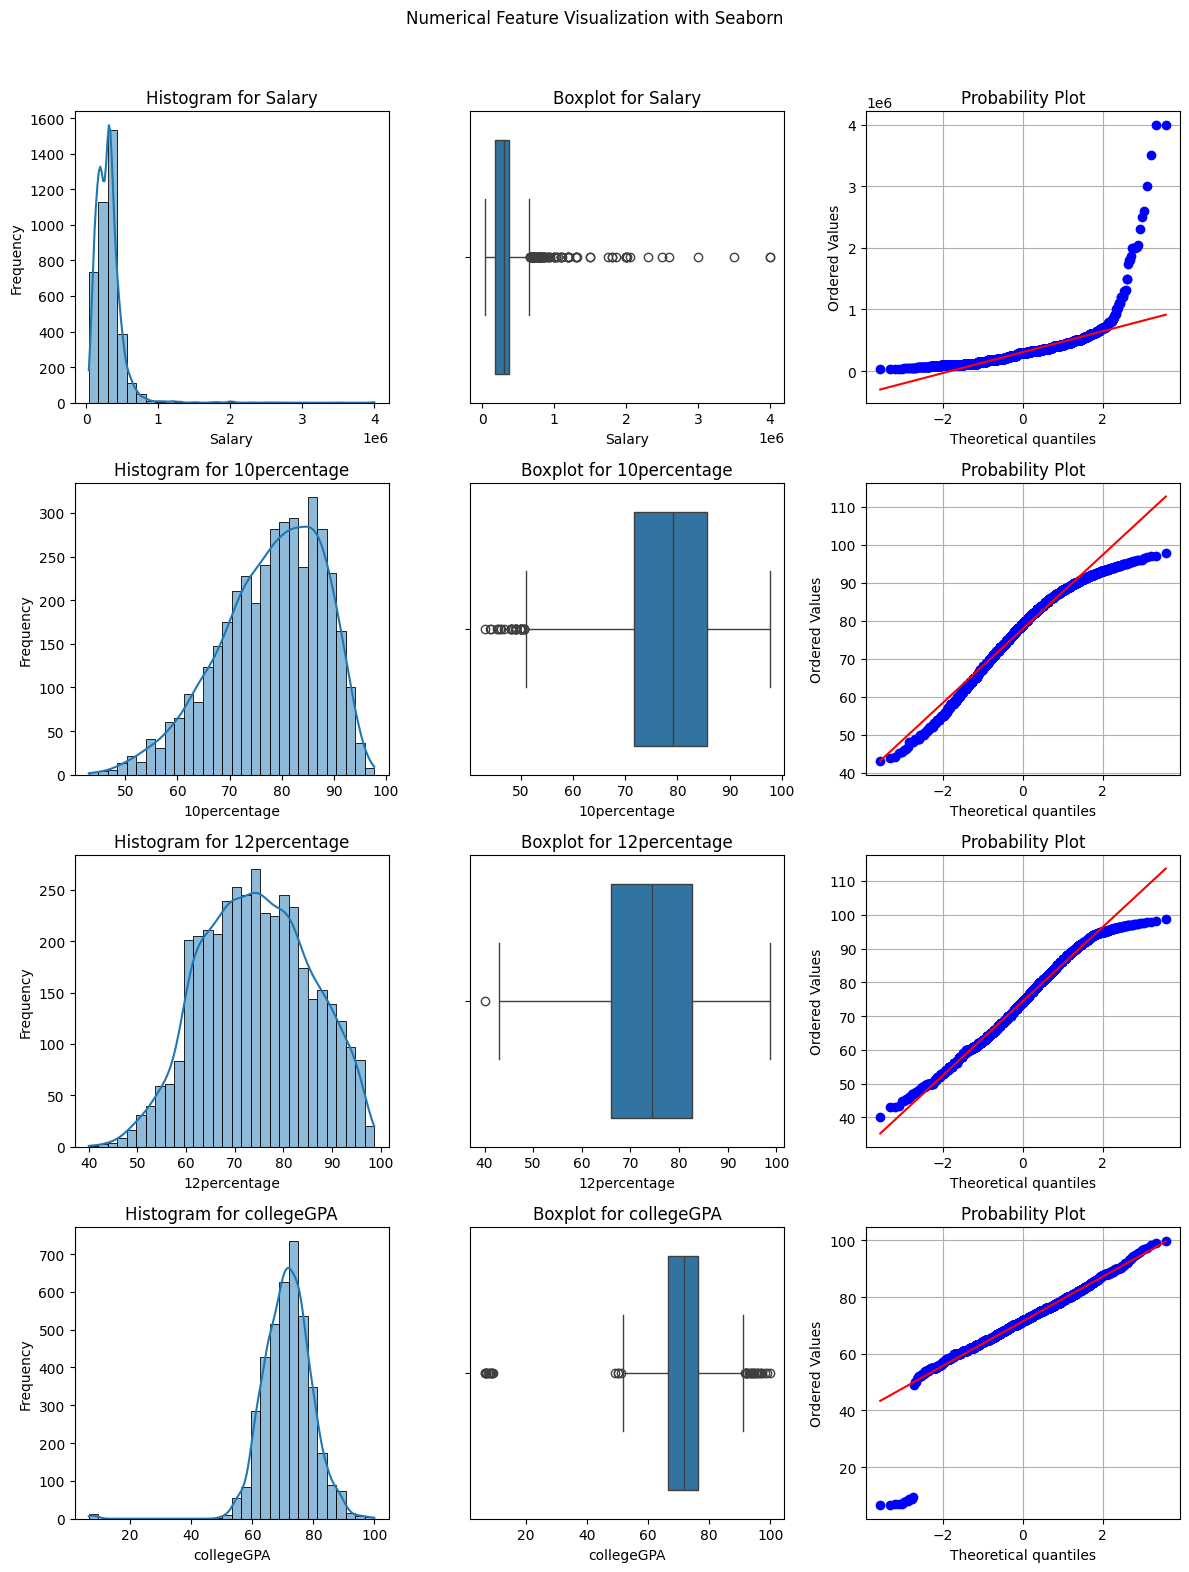

In [ ]:



numerical_data_1 = ['Salary', '10percentage', '12percentage', 'collegeGPA']

# Create subplots
fig, axes = plt.subplots(len(numerical_data_1), 3, figsize=(12, 4 * len(numerical_data_1)), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

for i, column in enumerate(numerical_data_1):
    # Plot Histogram
    sns.histplot(data=df, x=column, bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_ylabel('Frequency')

    # Plot Boxplot for Outlier Detection
    sns.boxplot(x=column, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')

    # plot Q-Q plot for checking normality
    stats.probplot(df[column], dist=stats.norm, plot=axes[i,2])
    axes[i,2].grid()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



**Salary Column:**


* The salaries in this dataset range from a minimum of 35,000 to a maximum of 4,000,000. The average (mean) salary is approximately 307,699.8, with the median (middle value) at 300,000. The mode, representing the most frequent salary, is also 300,000.


* Positively skewed distribution, indicating a concentration of lower salaries with a longer tail towards higher salaries.
* Presence of outliers detected through boxplot.
* Q-Q plot suggests deviation from normal distribution.

**10percentage, 12percentage, and collegeGPA Columns:**
* The 10th-grade percentages vary from a minimum of 43.0 to a maximum of 97.76. The average (mean) 10th-grade percentage is around 77.93, with the median at 79.15. The mode, indicating the most common percentage, is 78.0.
* For 12th-grade percentages, the range extends from a minimum of 40.0 to a maximum of 98.7. The mean 12th-grade percentage is 74.47, and the median is 74.4, suggesting a relatively balanced distribution. The mode for this column is 70.0.
* College GPAs range from a minimum of 6.45 (with potential outliers less than 40 that can be considered for removal) to a maximum of 99.93. The average (mean) college GPA is 71.49, with the median at 71.72.

* Negatively skewed distributions, suggesting a concentration of higher percentages with longer tails towards lower percentages.
* Presence of outliers detected through boxplot for each column except 12percentage with only a single outlier.
* The 12percentage column is notably close to a normal distribution, as indicated by the Q-Q plot.

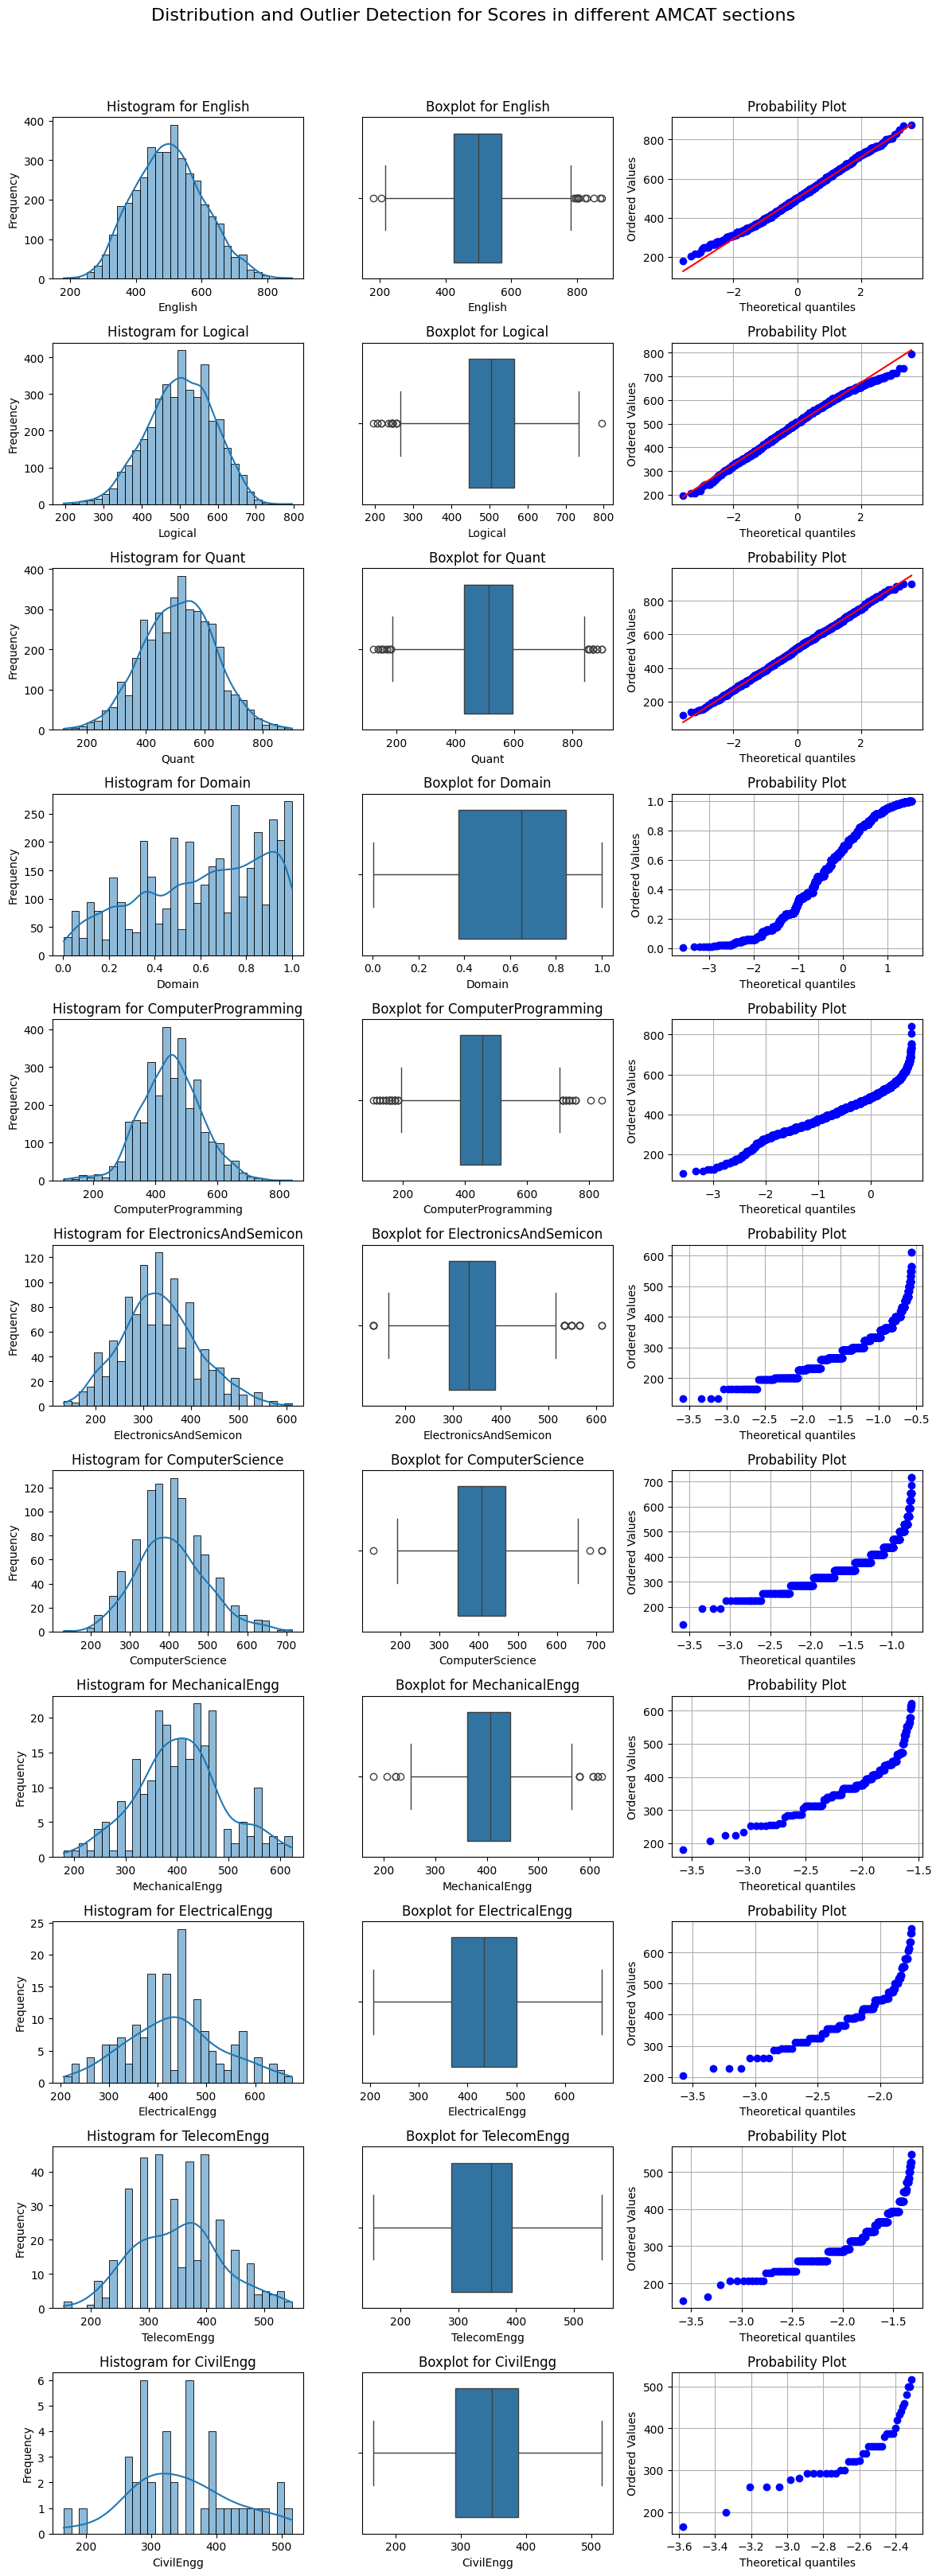

In [ ]:
numerical_data_2 = [
    'English', 'Logical', 'Quant', 'Domain',
    'ComputerProgramming', 'ElectronicsAndSemicon',
    'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
    'TelecomEngg', 'CivilEngg'
]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_data_2), ncols=3, figsize=(12, 3 * len(numerical_data_2)))
fig.suptitle('Distribution and Outlier Detection for Scores in different AMCAT sections', fontsize=16)

for i, column in enumerate(numerical_data_2):
    # Plot Histogram
    sns.histplot(data=df, x=column, bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_ylabel('Frequency')

    # Plot Boxplot for Outlier Detection
    sns.boxplot(x=column, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')
    # plot Q-Q plot for checking normality
    stats.probplot(df[column], dist=stats.norm, plot=axes[i,2])
    axes[i,2].grid()



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

English, logical, and quant scores exhibit approximately normal distributions. However, other variables contain -1, which can be considered as missing values. We have replaced -1 with NaN. After this replacement, most of the technical skill score columns appear to follow a normal distribution.

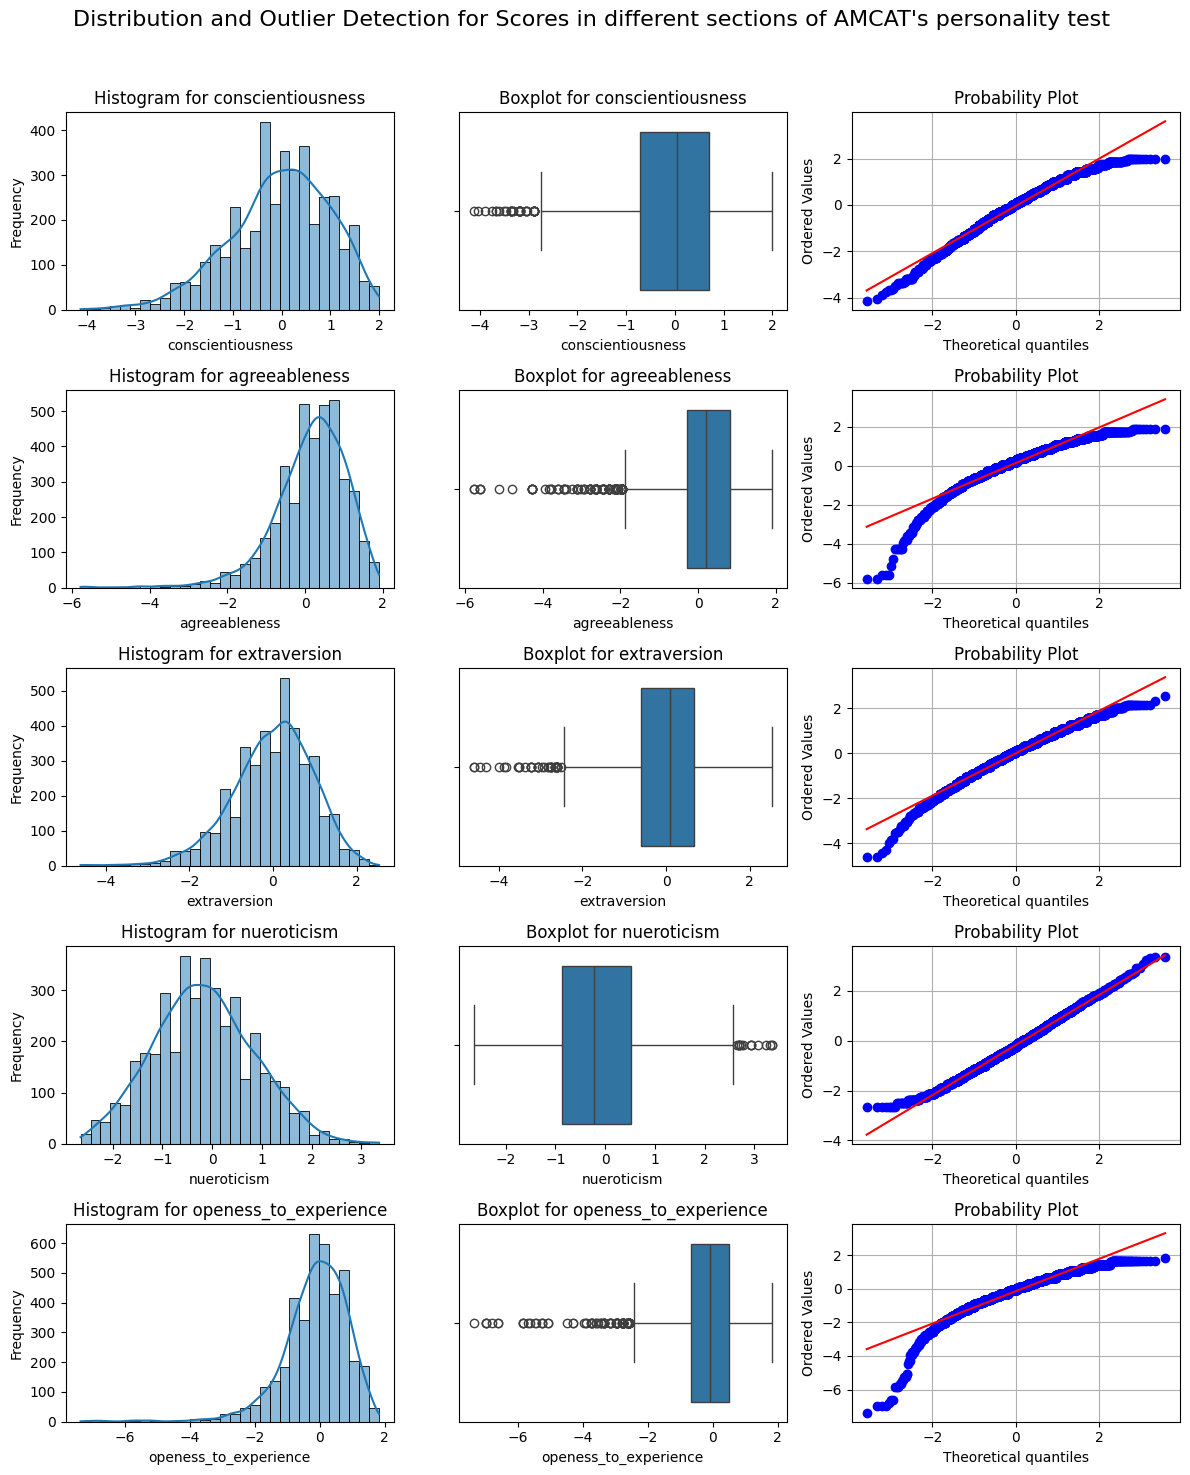

In [ ]:
numerical_data_3 = [
    'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'
]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_data_3), ncols=3, figsize=(12, 3 * len(numerical_data_3)))
fig.suptitle("Distribution and Outlier Detection for Scores in different sections of AMCAT's personality test ", fontsize=16)

for i, column in enumerate(numerical_data_3):
    # Plot Histogram
    sns.histplot(data=df, x=column, bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_ylabel('Frequency')

    # Plot Boxplot for Outlier Detection
    sns.boxplot(x=column, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')
    # plot Q-Q plot for checking normality
    stats.probplot(df[column], dist=stats.norm, plot=axes[i,2])
    axes[i,2].grid()



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Conscientiousness, agreeableness, and extraversion scores demonstrate negative skewness, indicating a concentration towards higher levels of these traits. Neuroticism scores display mild positive skewness, suggesting a focus on lower neuroticism levels. Openness to experience scores exhibit strong negative skewness, revealing a concentration towards higher openness levels. These skewness patterns offer concise insights into the prevailing directions of each personality trait within the dataset.

### **Univariate Analysis - Discrete Data**

In [ ]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

<ipython-input-21-3bfe58225d79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="pastel")


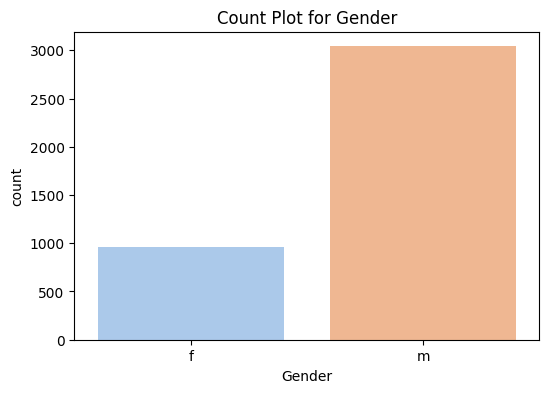

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette="pastel")
plt.title('Count Plot for Gender')
plt.show()

This bar plot clearly illustrates a significant gender imbalance in the dataset, with a substantial majority of 3041 males compared to 957 females. This asymmetry may introduce bias in gender-specific analyses

In [ ]:
df['DOL'].value_counts()

Leave      2123
Present    1875
Name: DOL, dtype: int64

<ipython-input-23-8693773586f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DOL', data=df, palette="pastel")


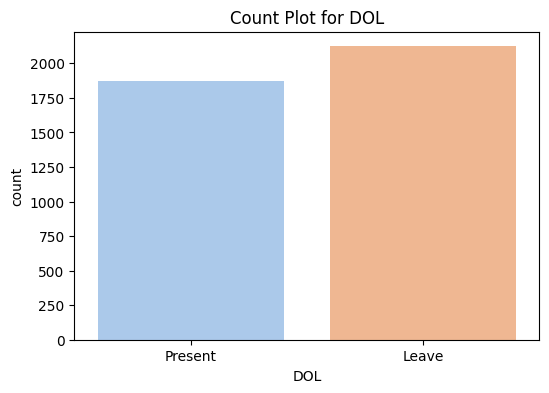

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DOL', data=df, palette="pastel")
plt.title('Count Plot for DOL')
plt.show()

The count plot for 'DOL' (Date of Leaving) indicates that a considerable number of individuals, 2123, are currently employed ('Leave' status), while 1875 are still in their present roles. This distribution provides insights into the employment status of the dataset, with a slightly higher representation of individuals who have not left their jobs.

In [ ]:
df['Designation'].value_counts().index[:15]

Index(['software engineer', 'software developer', 'system engineer',
       'programmer analyst', 'systems engineer', 'java software engineer',
       'software test engineer', 'project engineer',
       'technical support engineer', 'senior software engineer',
       'java developer', 'test engineer', 'web developer',
       'application developer', 'assistant manager'],
      dtype='object')

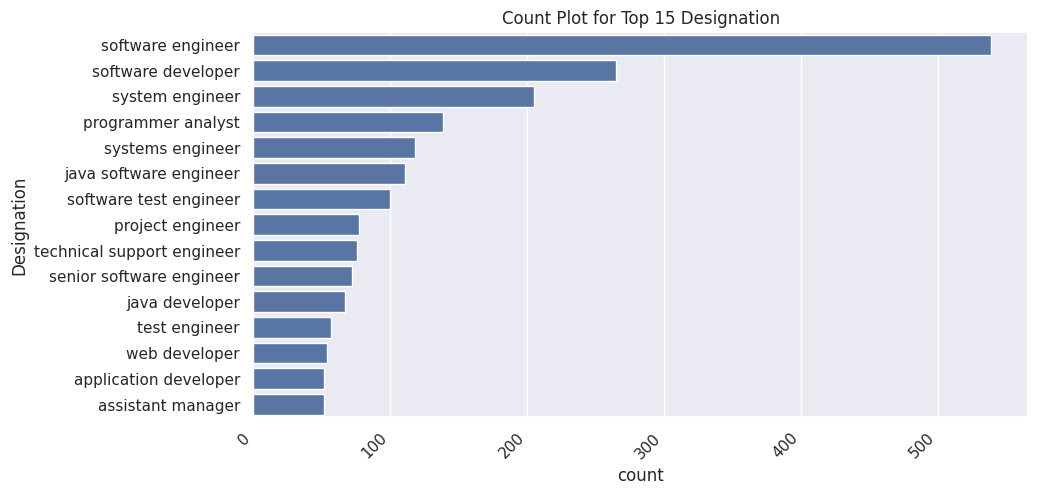

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
top_designation = df['Designation'].value_counts().index[:15]

# Plotting the count plot
sns.countplot(y='Designation', data=df, order = top_designation)
plt.title('Count Plot for Top 15 Designation')
# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

The majority of individuals in the dataset hold technical roles, with 'Software Engineer,' 'Software Developer,' and 'System Engineer' being the most prevalent designations. Additionally, managerial positions such as 'Assistant Manager' are also notable among the top 15 designations.

In [ ]:
df['JobCity'].value_counts().index[:15]

Index(['Bangalore', 'Noida', 'Hyderabad', 'Pune', 'Chennai', 'Gurgaon',
       'New Delhi', 'Mumbai', 'Kolkata', 'Jaipur', 'Lucknow', 'Mysore',
       'Navi Mumbai', 'chennai', 'pune'],
      dtype='object')

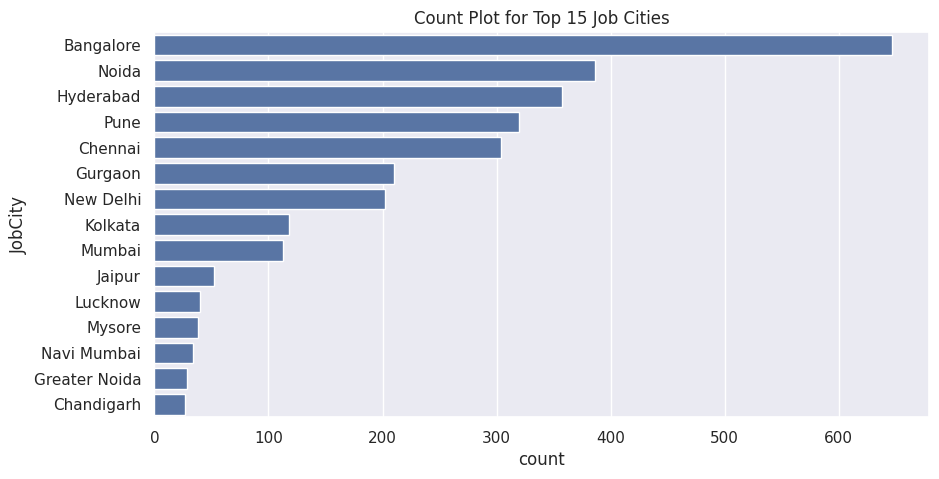

In [ ]:
df['JobCity'] = df['JobCity'].str.title()
plt.figure(figsize=(10, 5))
top_cities = df['JobCity'].value_counts().index[:15]
sns.countplot(y='JobCity', data=df, order=top_cities)
plt.title('Count Plot for Top 15 Job Cities')
plt.show()


The visualization highlights the distribution of job locations, revealing that Bangalore, Noida, and Hyderabad are the most preferred cities for employment among the top 15 cities. This suggests a concentration of job opportunities in these urban centers.

In [ ]:
df['10board'].value_counts().index[:15]

Index(['cbse', 'state board', '0', 'icse', 'ssc', 'up board', 'matriculation',
       'rbse', 'board of secondary education', 'up', 'mp board', 'wbbse',
       'sslc', 'central board of secondary education', 'kseeb'],
      dtype='object')

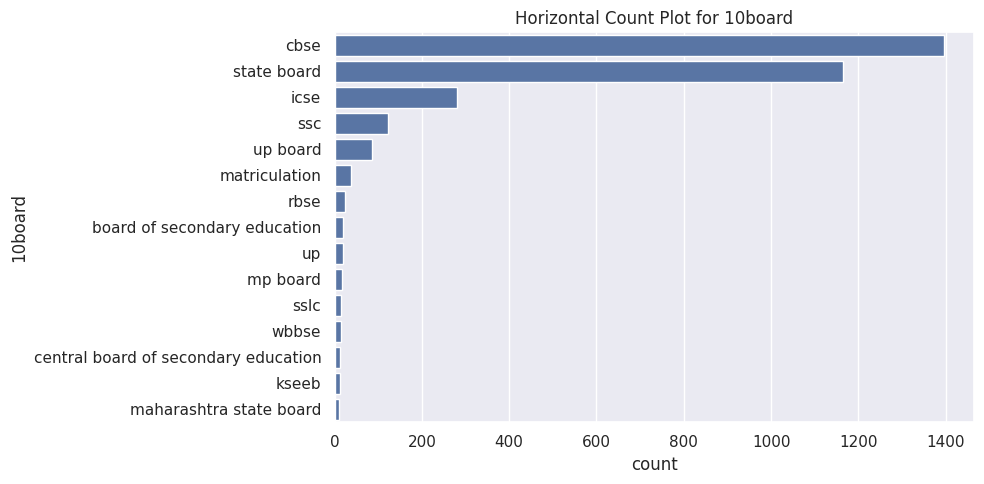

In [ ]:
df['10board'] = df['10board'].replace('0', np.nan)
top_boards = df['10board'].value_counts().index[:15]
plt.figure(figsize=(10, 5))
sns.countplot(y='10board', data=df, order=top_boards)
plt.title('Horizontal Count Plot for 10board')
plt.tight_layout()
plt.show()

The horizontal count plot illustrates the diverse educational backgrounds of candidates' 10th-grade boards. Notably, CBSE, State Board, and ICSE are the most prevalent, indicating a mix of central and state education systems among the top 15 boards.

In [ ]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<ipython-input-31-0c128144b1b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Degree', data=df, palette="pastel")


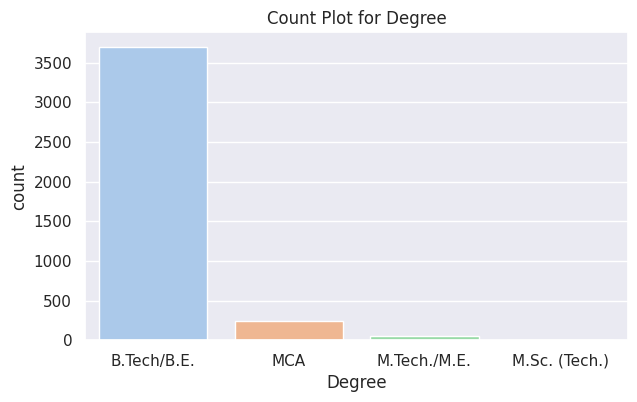

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Degree', data=df, palette="pastel")
plt.title('Count Plot for Degree')
plt.show()

The count plot reveals that a significant majority of candidates hold a B.Tech/B.E. degree, indicating a predominant technical educational background. MCA, M.Tech./M.E., and M.Sc. (Tech.) represent a smaller proportion of the degrees among the candidates

In [ ]:
df['Specialization'].value_counts().index[:15]

Index(['electronics and communication engineering',
       'computer science & engineering', 'information technology',
       'computer engineering', 'computer application',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications', 'electrical engineering',
       'electronics & instrumentation eng', 'civil engineering',
       'electronics and instrumentation engineering',
       'information science engineering',
       'instrumentation and control engineering', 'electronics engineering'],
      dtype='object')

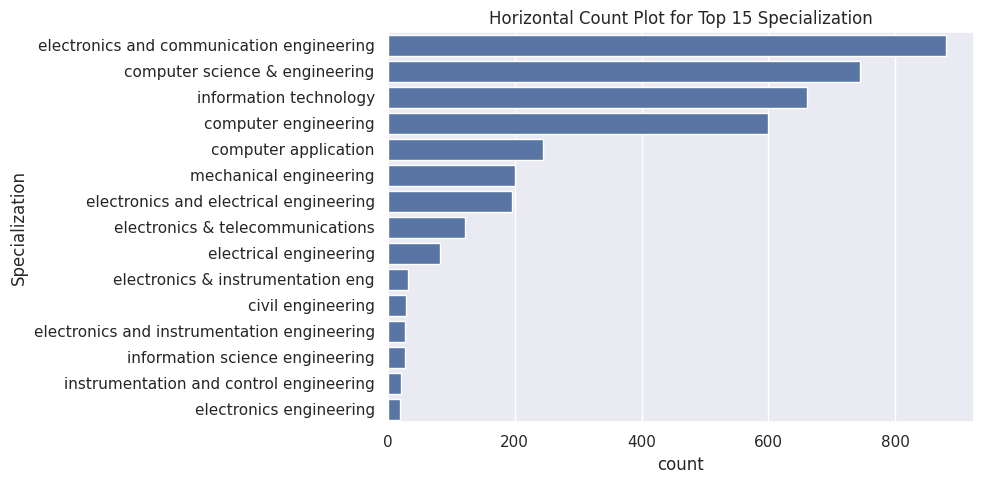

In [ ]:
plt.figure(figsize=(10, 5))
top_specialization = df['Specialization'].value_counts().index[:15]
sns.countplot(y='Specialization', data=df, order=top_specialization)
plt.title('Horizontal Count Plot for Top 15 Specialization')
plt.tight_layout()
plt.show()

The horizontal count plot illustrates the distribution of top 15 specializations among candidates. The most prevalent specializations include 'Electronics and Communication Engineering,' 'Computer Science & Engineering,' and 'Information Technology,' suggesting a focus on these technical disciplines among the candidates

In [ ]:
df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

<ipython-input-35-e2a5f5875bb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CollegeTier', data=df, palette="pastel")


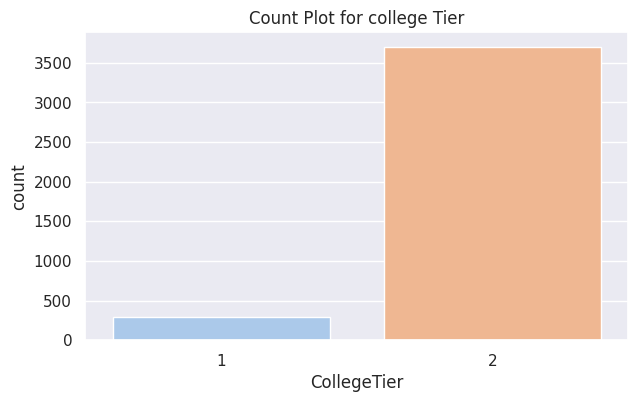

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x='CollegeTier', data=df, palette="pastel")
plt.title('Count Plot for college Tier')
plt.show()

The count plot for College Tier shows that the majority of candidates attended Tier 2 colleges, with a significantly lower number from Tier 1 colleges.

In [ ]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

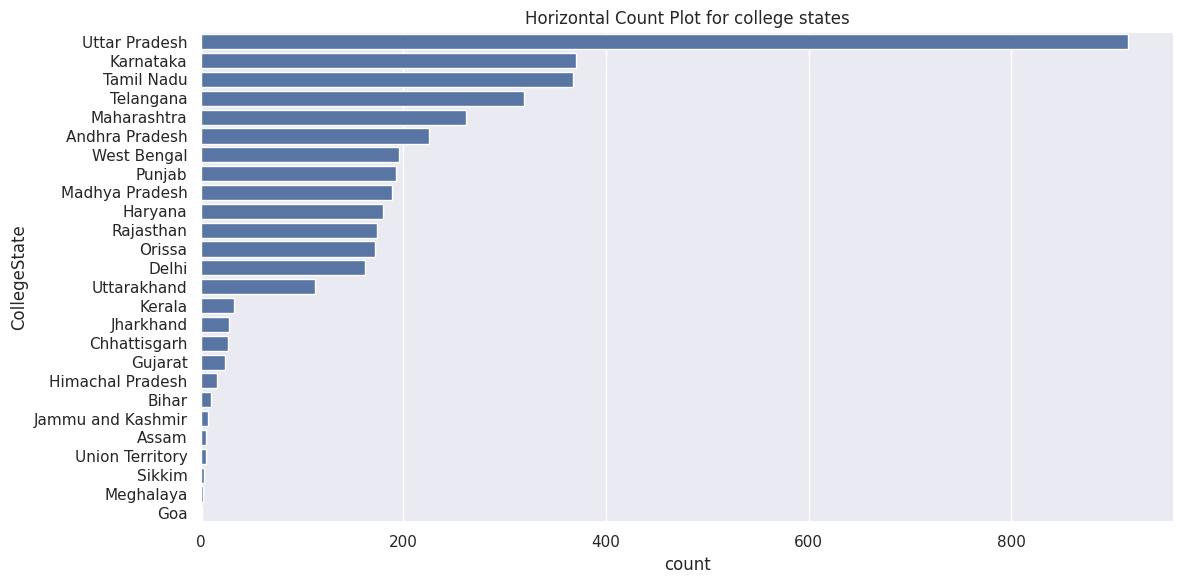

In [ ]:
plt.figure(figsize=(12, 6))
states = df['CollegeState'].value_counts().index
sns.countplot(y='CollegeState', data=df, order=states)
plt.title('Horizontal Count Plot for college states')
plt.tight_layout()
plt.show()


The horizontal count plot for College States reveals that candidates from Uttar Pradesh, Karnataka, and Tamil Nadu are the top contributors. Especially from Uttar Pradesh a very high number compared to all other states while several states have a lower representation in the dataset.

In [ ]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

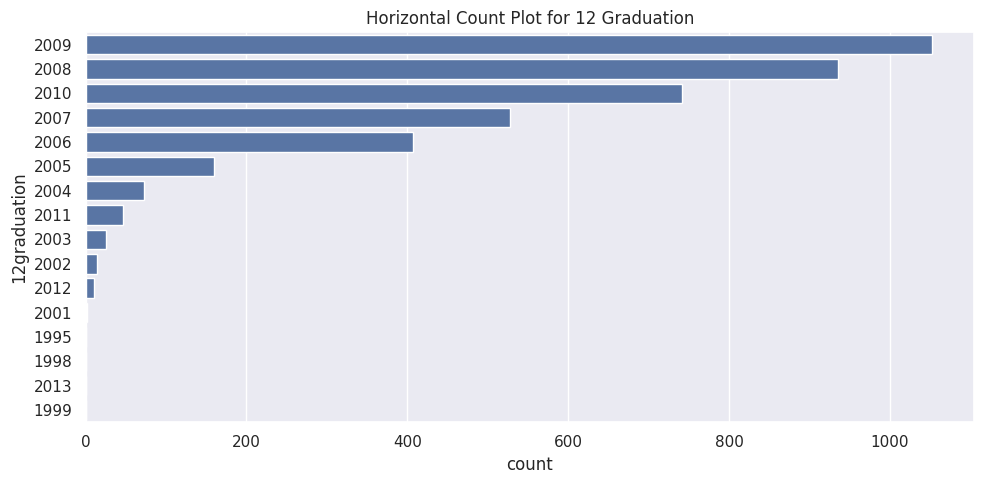

In [ ]:
plt.figure(figsize=(10, 5))
years = df['12graduation'].value_counts().index
sns.countplot(y='12graduation', data=df, order=years)
plt.title('Horizontal Count Plot for 12 Graduation')
plt.tight_layout()
plt.show()

The horizontal count plot for 12th-grade graduation years indicates that the majority of candidates graduated in the years 2009, 2008, and 2010 with 2007 and 2006 following closely.

In [ ]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

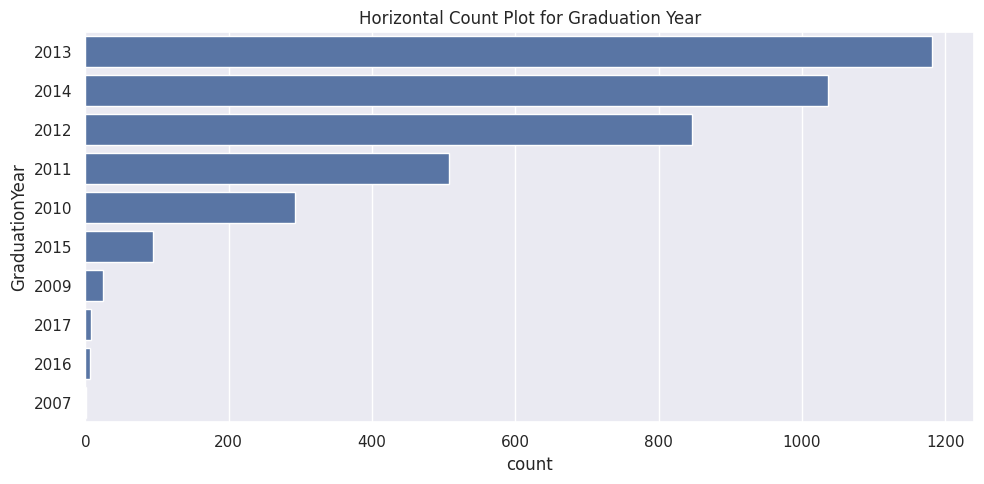

In [ ]:
df['GraduationYear'] = df['GraduationYear'].replace(0,np.nan).astype('Int64')
plt.figure(figsize=(10, 5))
years = df['GraduationYear'].value_counts().index
sns.countplot(y='GraduationYear', data=df, order=years)
plt.title('Horizontal Count Plot for Graduation Year')
plt.tight_layout()
plt.show()

The horizontal count plot for graduation years suggests that the majority of candidates completed their graduation in the years 2013, 2014, and 2012. From the above count plot it appears that it took about 4 years to graduate after 12th graduation.

## **Bivariate Analysis**

### **Bivariate Analysis - Numerical vs Numerical**

In [ ]:
def pearson_test(data1, data2, significance_level):
    stat, p_value = stats.pearsonr(data1, data2)

    print('stat=%.3f, p=%.3f' % (stat, p_value))

    if p_value < significance_level:
        print('Reject null hypothesis (H0): Probably linear relationship exists')
    else:
        print('Fail to Reject null hypothesis (H0): Probably linear relationship doesnot exists')

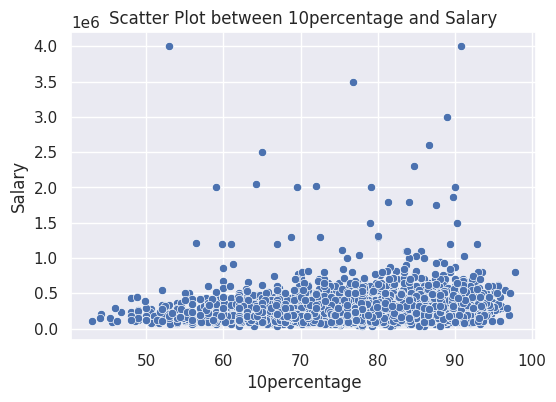

stat=0.177, p=0.000
Reject null hypothesis (H0): Probably linear relationship exists


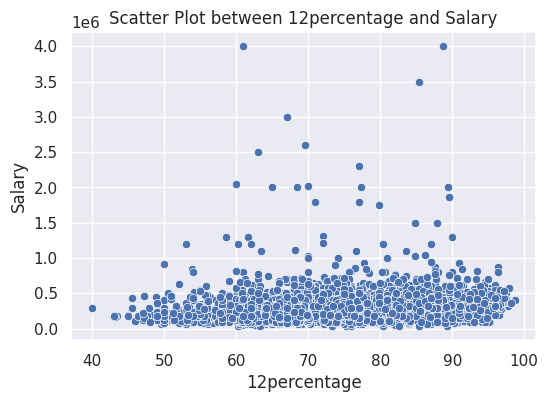

stat=0.170, p=0.000
Reject null hypothesis (H0): Probably linear relationship exists


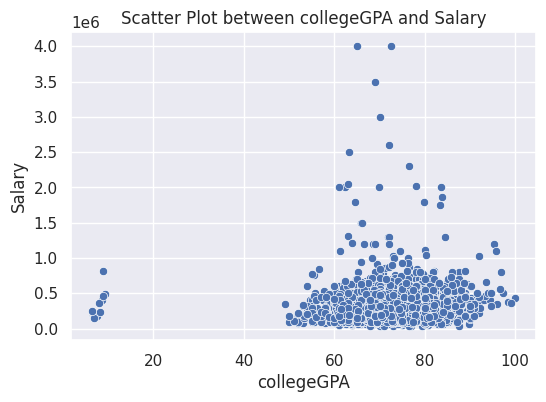

stat=0.130, p=0.000
Reject null hypothesis (H0): Probably linear relationship exists


In [ ]:
numerical_columns_1 = ['10percentage','12percentage','collegeGPA']
for col in numerical_columns_1:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='Salary', data=df)
    plt.title(f'Scatter Plot between {col} and Salary')
    plt.show()
    pearson_test(df[col], df['Salary'], significance_level=0.05)


The scatter plots between '10percentage', '12percentage', 'collegeGPA', and 'Salary' suggest a probable linear relationship, supported by the rejection of the null hypothesis in the Pearson correlation tests. This indicates that higher academic performance is associated with higher salary levels in the dataset.

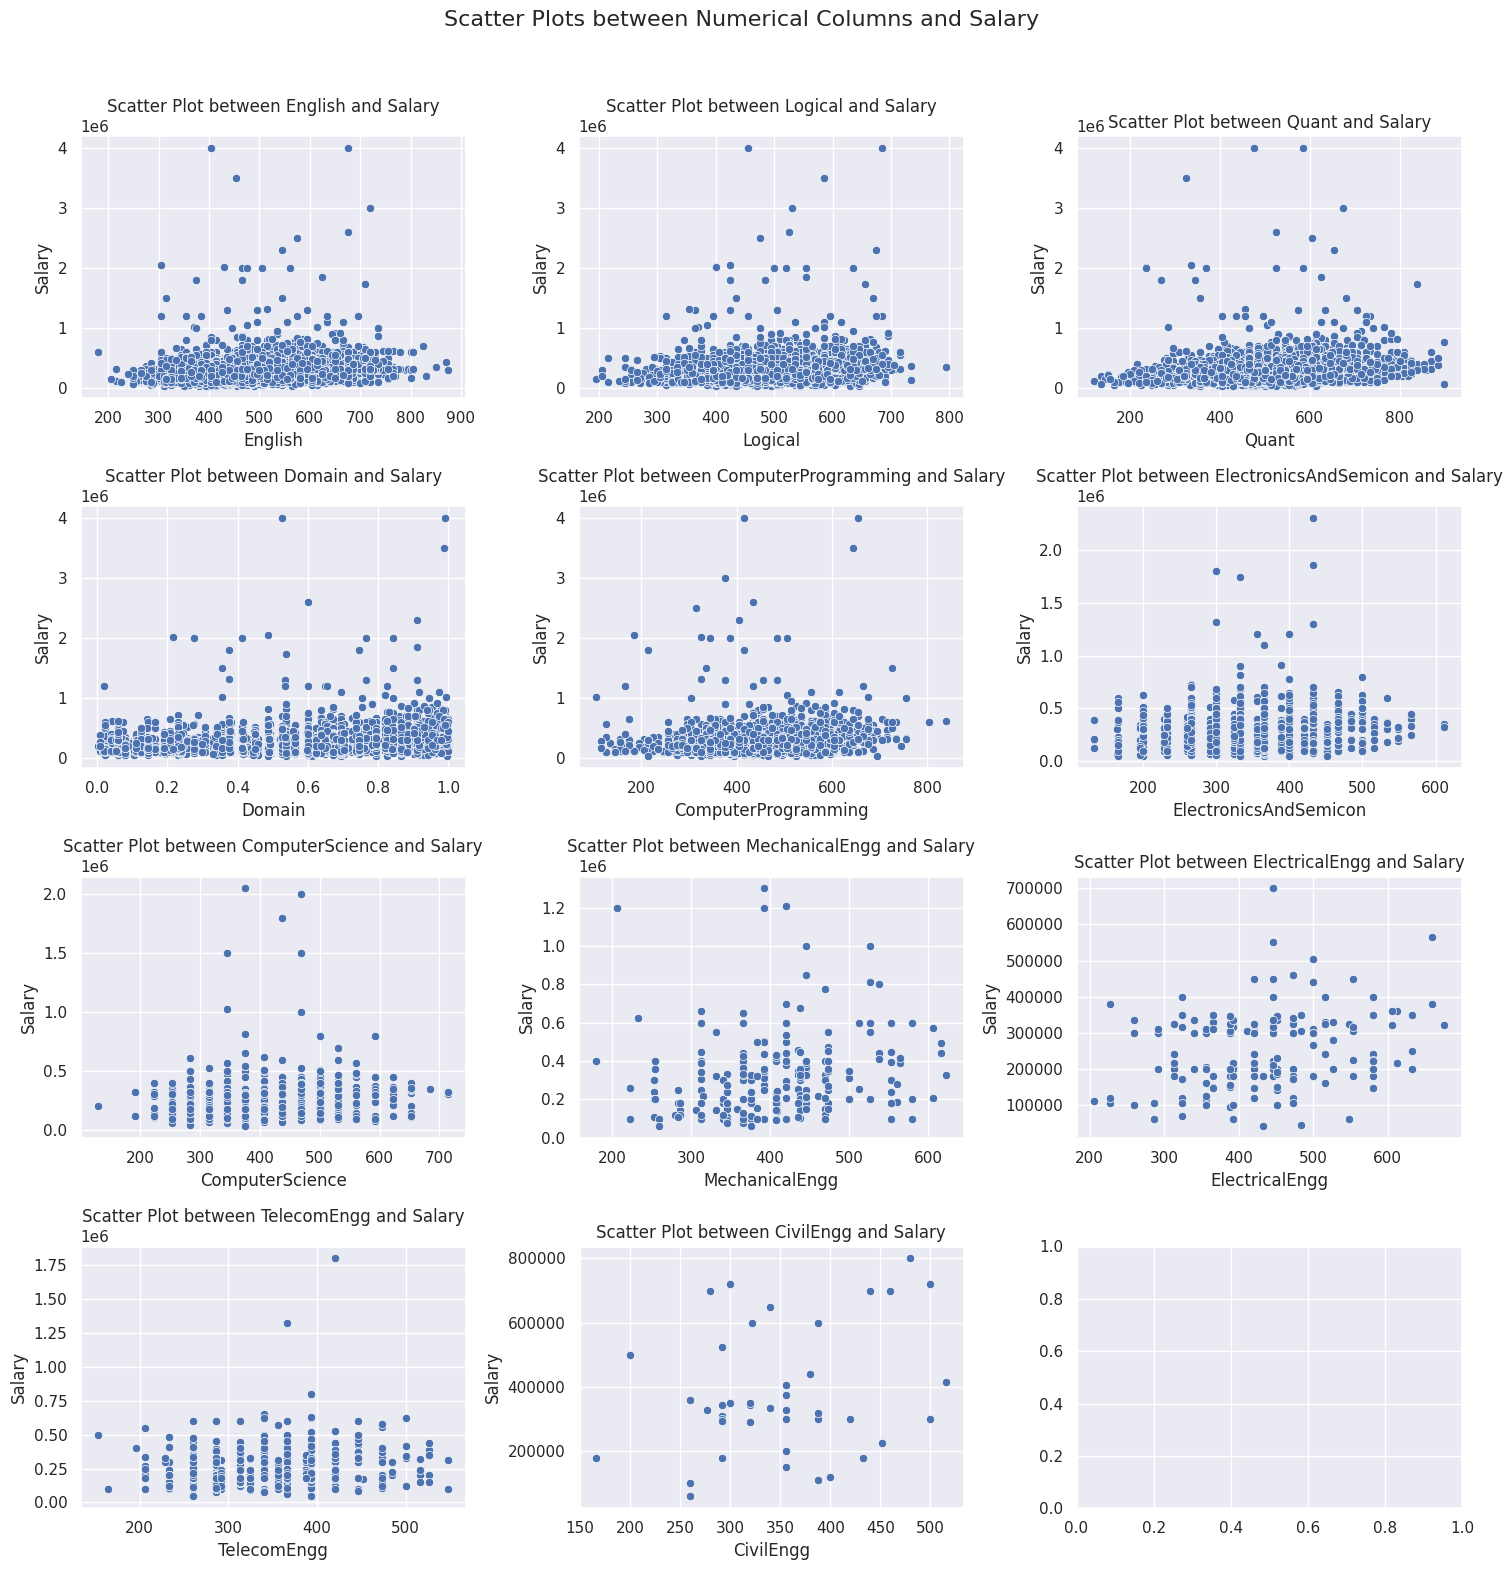

In [ ]:
numerical_columns = [
    'English', 'Logical', 'Quant', 'Domain',
    'ComputerProgramming', 'ElectronicsAndSemicon',
    'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
    'TelecomEngg', 'CivilEngg'
]

num_rows = 4
num_cols = 3

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
fig.suptitle('Scatter Plots between Numerical Columns and Salary', fontsize=16)

# Loop through numerical columns and create scatter plots
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=column, y='Salary', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot between {column} and Salary')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Salary')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The scatter plots between Salary and columns related to scores in different technical and cognitive skills suggest potential linear relationships, indicating that higher scores in English, Logical, Quant, Domain, ComputerProgramming, etc are associated with higher salary levels in the dataset.

### **Bivariate Analysis - Numerical vs Categorical**

In [ ]:
def two_sample_ttest(data1, data2, significance_level):
    stat, p_val = stats.ttest_ind(data1, data2)

    print('stat=%.3f, p_val=%.3f' % (stat, p_val))

    if p_val < significance_level:
        print('Reject null hypothesis (H0): There is a significant difference between the groups.')
    else:
        print('Fail to Reject null hypothesis (H0): There is no significant difference between the groups.')

In [ ]:
print(df.groupby('Gender')['Salary'].median())
print()
print(df.groupby('CollegeTier')['Salary'].median())
print()
print(df.groupby('CollegeCityTier')['Salary'].median())

Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64

CollegeTier
1    360000.0
2    300000.0
Name: Salary, dtype: float64

CollegeCityTier
0    300000.0
1    300000.0
Name: Salary, dtype: float64


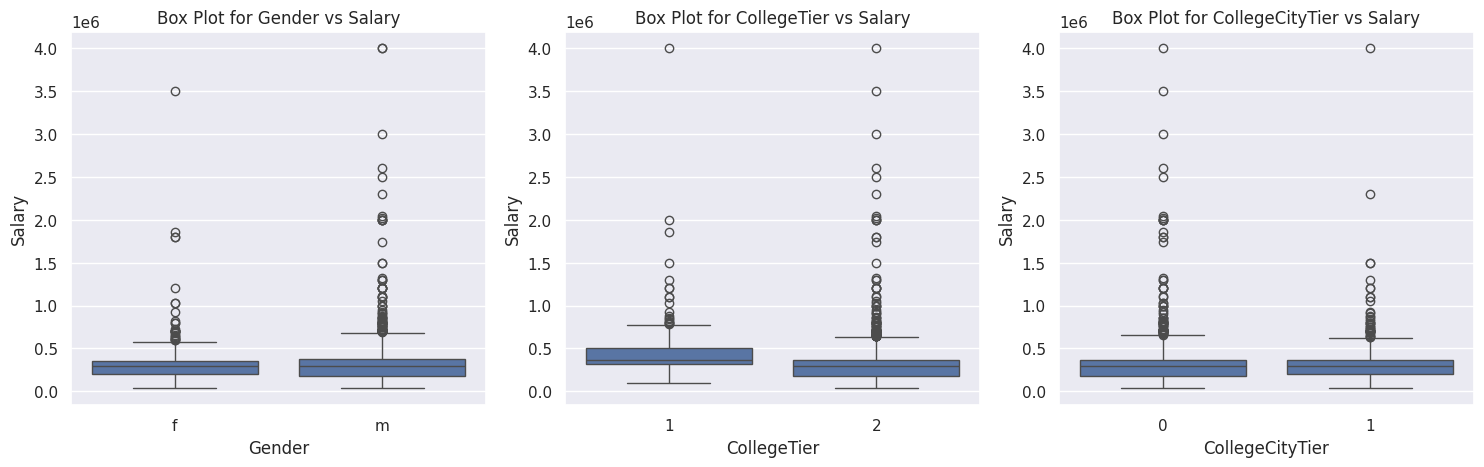

In [ ]:
cat_col = ['Gender','CollegeTier','CollegeCityTier']
fig, axs = plt.subplots(1, len(cat_col), figsize=(15, 5))
for i, col in enumerate(cat_col):
    sns.boxplot(data=df, x=col, y='Salary', ax=axs[i])
    axs[i].set_title(f'Box Plot for {col} vs Salary')
plt.tight_layout()
plt.show()

The box plots illustrate the relationship between Salary and different categorical variables. Notably, a significant disparity in Salary is evident between College Tiers, where Tier 1 exhibits higher salaries than Tier 2 supported by two sample t test(stat=5.080, p_val=0.000). In contrast, Salary variations based on Gender and College City Tier are not statistically significant.

In [ ]:
male_salary = df[df.Gender=='m']['Salary'].sample(n=100)
female_salary = df[df.Gender=='f']['Salary'].sample(n=100)
print('Two Sample t-Test between columns Gender and Salary:')
print()
two_sample_ttest(male_salary, female_salary, significance_level = 0.05)

Two Sample t-Test between columns Gender and Salary:

stat=3.205, p_val=0.002
Reject null hypothesis (H0): There is a significant difference between the groups.


In [ ]:
college_tier1_salary = df[df.CollegeTier==1]['Salary'].sample(n=100)
college_tier2_salary = df[df.CollegeTier==2]['Salary'].sample(n=100)
print('Two Sample t-Test between columns CollegeTier and Salary:')
print()
two_sample_ttest(college_tier1_salary, college_tier2_salary, significance_level = 0.05)

Two Sample t-Test between columns CollegeTier and Salary:

stat=5.797, p_val=0.000
Reject null hypothesis (H0): There is a significant difference between the groups.


In [ ]:
college_tier0_salary = df[df.CollegeCityTier==0]['Salary'].sample(n=100)
college_tier1_salary = df[df.CollegeCityTier==1]['Salary'].sample(n=100)
print('Two Sample t-Test between columns CollegeCityTier and Salary:')
print()
two_sample_ttest(college_tier0_salary, college_tier1_salary, significance_level = 0.05)

Two Sample t-Test between columns CollegeCityTier and Salary:

stat=0.533, p_val=0.595
Fail to Reject null hypothesis (H0): There is no significant difference between the groups.


In [ ]:
def one_way_anova(all_groups, significance_level):
    stat, p_val = stats.f_oneway(*all_groups)

    print('stat=%.3f, p_val=%.3f' % (stat, p_val))

    if p_val < significance_level:
        print('Reject null hypothesis (H0): There is a significant difference between the groups.')
    else:
        print('Fail to Reject null hypothesis (H0): There is no significant difference between the groups.')

In [ ]:
df.groupby('Degree')['Salary'].median()

Degree
B.Tech/B.E.      300000.0
M.Sc. (Tech.)    320000.0
M.Tech./M.E.     340000.0
MCA              220000.0
Name: Salary, dtype: float64

<Axes: xlabel='Degree', ylabel='Salary'>

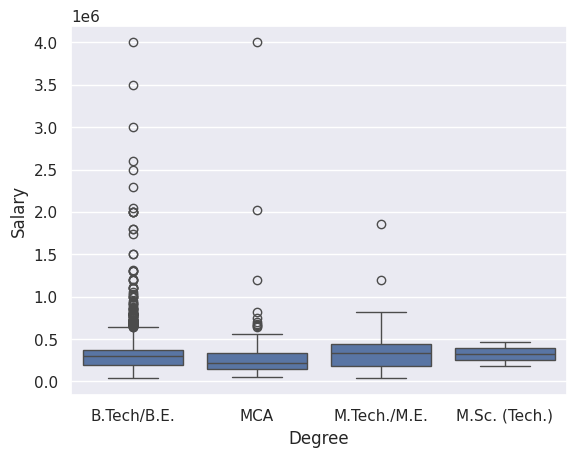

In [ ]:
sns.boxplot(data = df, x='Degree', y='Salary')

The box plot displays Salary variations among different degrees, indicating a slightly higher mean for M.Tech/M.E. The one-way ANOVA test supports this observation, revealing a significant difference (p_val=0.047) and rejecting the null hypothesis, emphasizing the influence of Degree on Salary distinctions.

In [ ]:
b_tech = df[df['Degree']=='B.Tech/B.E.']['Salary']
mca = df[df['Degree']=='MCA']['Salary']
m_tech = df[df['Degree']=='M.Tech./M.E.']['Salary']
msc_tech = df[df['Degree']=='M.Sc. (Tech.)']['Salary']

all_groups = [b_tech, mca, m_tech, msc_tech]
one_way_anova(all_groups, significance_level=0.05)

stat=2.656, p_val=0.047
Reject null hypothesis (H0): There is a significant difference between the groups.


In [ ]:
df[df['JobCity'].isin(top_cities)].groupby('JobCity')['Salary'].mean().sort_values()

JobCity
Lucknow          213750.000000
Kolkata          250762.711864
Jaipur           252115.384615
Greater Noida    264448.275862
New Delhi        273787.128713
Chennai          288700.657895
Mysore           290526.315789
Noida            298769.430052
Hyderabad        308711.484594
Navi Mumbai      320147.058824
Chandigarh       327592.592593
Pune             330750.000000
Gurgaon          336880.952381
Bangalore        355471.406491
Mumbai           381548.672566
Name: Salary, dtype: float64

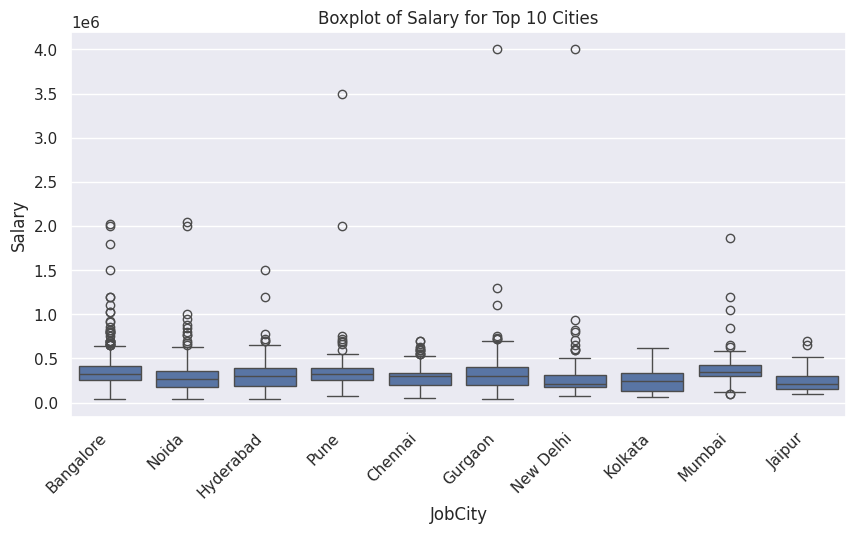

In [ ]:
top_cities = df['JobCity'].value_counts().index[:10]
plt.figure(figsize=(10, 5))
# Plot the boxplot
sns.boxplot(data=df[df['JobCity'].isin(top_cities)], x='JobCity', y='Salary', order=top_cities)
plt.title('Boxplot of Salary for Top 10 Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

The Salary distribution across different job cities highlights a significant difference, with Mumbai exhibiting the highest mean salary and Bangalore, Gurgaon, Pune and Hyderabad following suit. The one-way ANOVA test (p_val=0.000) supports this observation, rejecting the null hypothesis and confirming a substantial disparity in Salary based on Job City.

In [ ]:
ban = df[df['JobCity']=='Bangalore']['Salary']
noa = df[df['JobCity']=='Noida']['Salary']
hyd = df[df['JobCity']=='Mumbai']['Salary']
mum = df[df['JobCity']=='Hyderabad']['Salary']

all_groups = [ban, noa, hyd, mum]
one_way_anova(all_groups, significance_level=0.05)

stat=11.780, p_val=0.000
Reject null hypothesis (H0): There is a significant difference between the groups.


In [ ]:
df[df['Designation'].isin(top_designation)].groupby('Designation')['Salary'].mean().sort_values()

Designation
web developer                 168981.481481
technical support engineer    239078.947368
java developer                245000.000000
software developer            258377.358491
test engineer                 286491.228070
java software engineer        301306.306306
project engineer              312922.077922
software test engineer        337450.000000
programmer analyst            339784.172662
software engineer             341215.213358
system engineer               354048.780488
systems engineer              369364.406780
application developer         419038.461538
assistant manager             442692.307692
senior software engineer      544027.777778
Name: Salary, dtype: float64

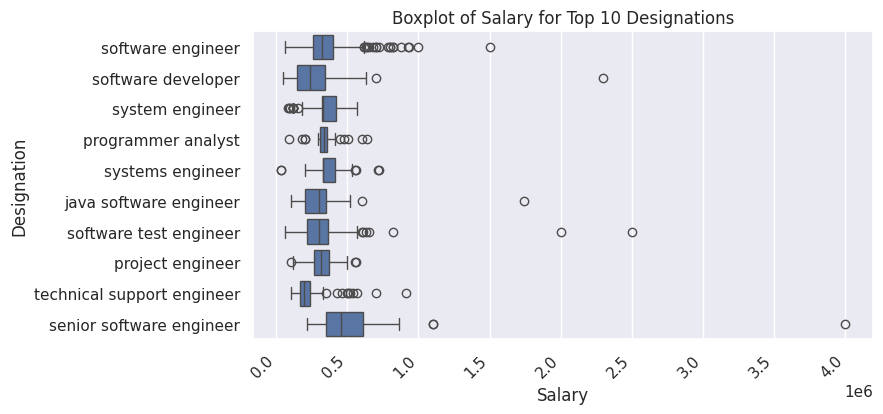

In [ ]:
top_designation = df['Designation'].value_counts().index[:10]
plt.figure(figsize=(8, 4))
# Plot the boxplot
sns.boxplot(data=df[df['Designation'].isin(top_designation)], x='Salary', y='Designation', order=top_designation)
plt.title('Boxplot of Salary for Top 10 Designations')
plt.xticks(rotation=45, ha='right')
plt.show()

The box plot for the top 10 Designations highlights noteworthy variations in Salary, with "Senior Software Engineer" exhibiting a significantly higher mean Salary compared to other roles. Subsequent one-way ANOVA testing, focusing on 'senior software engineer,' 'software engineer,' 'system engineer,' and 'technical support engineer,' confirms a substantial distinction in Salary (stat=37.879, p_val=0.000). The rejection of the null hypothesis underscores a significant variance in Salary across these Designations, emphasizing the influence of job roles on compensation differences.

In [ ]:
ban = df[df['Designation']=='senior software engineer']['Salary']
noa = df[df['Designation']=='software engineer']['Salary']
hyd = df[df['Designation']=='system engineer']['Salary']
mum = df[df['Designation']=='technical support engineer']['Salary']

all_groups = [ban, noa, hyd, mum]
one_way_anova(all_groups, significance_level=0.05)

stat=37.879, p_val=0.000
Reject null hypothesis (H0): There is a significant difference between the groups.


In [ ]:
df[df['Specialization'].isin(top_specialization)].groupby('Specialization')['Salary'].mean().sort_values()

Specialization
information science engineering                276296.296296
computer science & engineering                 277439.516129
electronics engineering                        279473.684211
computer application                           280389.344262
electronics and electrical engineering         286913.265306
electronics & telecommunications               293553.719008
electrical engineering                         293780.487805
electronics and communication engineering      296812.500000
information technology                         308492.424242
mechanical engineering                         317457.711443
electronics and instrumentation engineering    327407.407407
electronics & instrumentation eng              364531.250000
computer engineering                           374100.000000
civil engineering                              381206.896552
instrumentation and control engineering        394000.000000
Name: Salary, dtype: float64

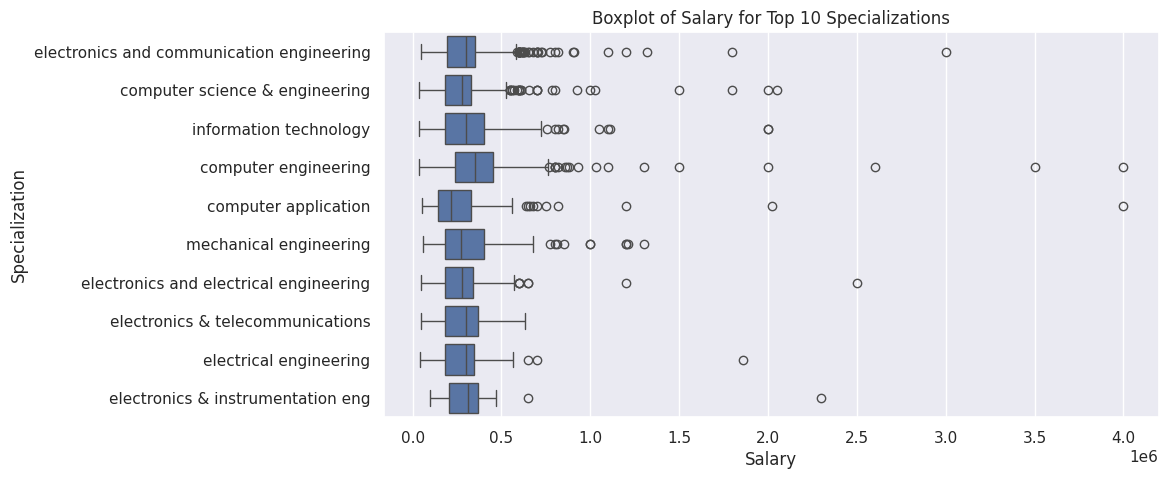

In [ ]:
top_specialization = df['Specialization'].value_counts().index[:10]
plt.figure(figsize=(10, 5))
# Plot the boxplot
sns.boxplot(data=df[df['Specialization'].isin(top_specialization)], x='Salary', y='Specialization', order=top_specialization)
plt.title('Boxplot of Salary for Top 10 Specializations')
plt.show()

The Salary distribution across different specializations reveals substantial differences, with "Computer Engineering" exhibiting the highest mean Salary. The subsequent one-way ANOVA analysis focusing on 'computer engineering,' 'computer application,' 'mechanical engineering,' and 'electronics and communication engineering' confirms a significant distinction in Salary (stat=15.592, p_val=0.000). The rejection of the null hypothesis underscores a substantial variance in Salary based on Specialization, emphasizing the impact of academic focus on compensation disparities.

In [ ]:
ban = df[df['Specialization']=='computer engineering']['Salary']
noa = df[df['Specialization']=='computer application']['Salary']
hyd = df[df['Specialization']=='mechanical engineering']['Salary']
mum = df[df['Specialization']=='electronics and communication engineering']['Salary']

all_groups = [ban, noa, hyd, mum]
one_way_anova(all_groups, significance_level=0.05)

stat=15.592, p_val=0.000
Reject null hypothesis (H0): There is a significant difference between the groups.


### **Bivariate Analysis - Categorical vs Categorical**

In [ ]:
def chi_square(freq_table, significance_level):
    stat, p_val, dof, expected = stats.chi2_contingency(freq_table)

    print('stat=%.3f, p=%.3f' % (stat, p_val))

    if p_val < significance_level:
        print('Reject null hypothesis (H0): Probably dependent')
    else:
        print('Fail to Reject null hypothesis (H0): Probably independent')

In [ ]:
subset_df_specialization = df[df['Specialization'].isin(top_specialization)]
freq_table = pd.crosstab(subset_df_specialization['Gender'], subset_df_specialization['Specialization'])
freq_table

Specialization,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & instrumentation eng,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,information technology,mechanical engineering
Gender,,,,,,,,,,
f,59,175,183,17,10,28,212,34,173,10
m,185,425,561,65,22,93,668,162,487,191


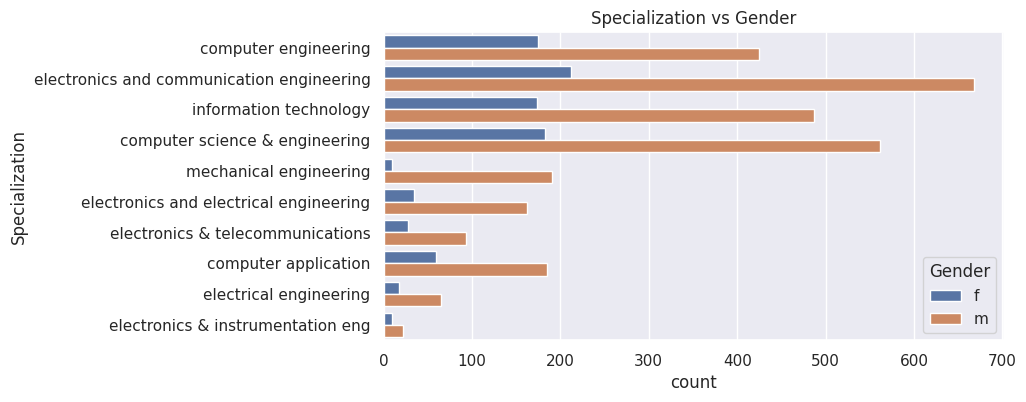

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=subset_df_specialization, y='Specialization', hue='Gender')
plt.title('Specialization vs Gender')
plt.show()

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=56.856, p=0.000
Reject null hypothesis (H0): Probably dependent


The count plot visually confirms the significant association between Specialization and Gender. The chi-square test (stat=56.856, p=0.000) rejects the null hypothesis, suggesting a probable dependence between the two variables, emphasizing that the choice of Specialization is not independent of Gender in the dataset.

In [ ]:
freq_table = pd.crosstab(df['Gender'], df['Degree'])
freq_table

Degree,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA
Gender,,,,
f,889,1,9,58
m,2811,1,44,185


Text(0.5, 1.0, 'Degree vs Gender')

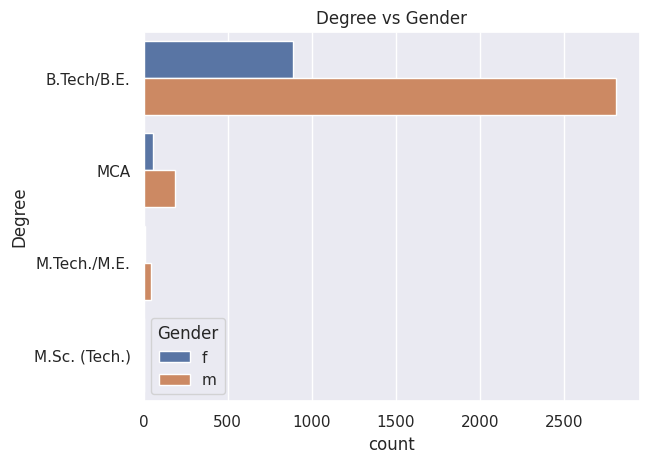

In [ ]:
sns.countplot(data=df, y='Degree', hue='Gender')
plt.title('Degree vs Gender')

In [ ]:
chi_square(freq_table, significance_level=0.05)


stat=2.172, p=0.538
Fail to Reject null hypothesis (H0): Probably independent



The count plot depicting the distribution of Degrees among different Genders does not reveal a clear pattern of dependence. The chi-square test (stat=2.172, p=0.538) fails to reject the null hypothesis, suggesting that there is likely independence between Degree and Gender in the dataset.

In [ ]:
subset_df_jobcity = df[df['JobCity'].isin(top_cities)]
freq_table = pd.crosstab(subset_df_jobcity['Gender'], subset_df_jobcity['JobCity'],normalize='columns')
freq_table

JobCity,Bangalore,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,New Delhi,Noida,Pune
Gender,,,,,,,,,,
f,0.268934,0.259868,0.266667,0.313725,0.230769,0.211864,0.256637,0.178218,0.238342,0.23125
m,0.731066,0.740132,0.733333,0.686275,0.769231,0.788136,0.743363,0.821782,0.761658,0.76875


Text(0.5, 1.0, 'JobCity vs Gender')

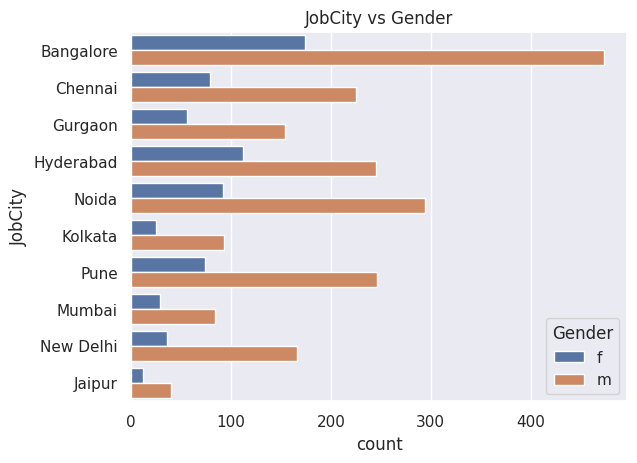

In [ ]:
sns.countplot(data=subset_df_jobcity, y='JobCity', hue='Gender')
plt.title('JobCity vs Gender')

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=0.065, p=1.000
Fail to Reject null hypothesis (H0): Probably independent


The count plot depicting the distribution of Genders across the top 10 Job Cities visually aligns with the chi-square test results (stat=0.065, p=1.000). The fail to reject the null hypothesis suggests probable independence between Job City and Gender in the dataset, confirming that gender proportions across these cities are likely independent.

In [ ]:
subset_df_designation = df[df['Designation'].isin(top_designation)]
freq_table = pd.crosstab(subset_df_designation['Gender'], subset_df_designation['Designation'],normalize='columns')
freq_table

Designation,java software engineer,programmer analyst,project engineer,senior software engineer,software developer,software engineer,software test engineer,system engineer,systems engineer,technical support engineer
Gender,,,,,,,,,,
f,0.126126,0.280576,0.194805,0.222222,0.215094,0.243043,0.31,0.22439,0.262712,0.276316
m,0.873874,0.719424,0.805195,0.777778,0.784906,0.756957,0.69,0.77561,0.737288,0.723684


Text(0.5, 1.0, 'Designation vs Gender')

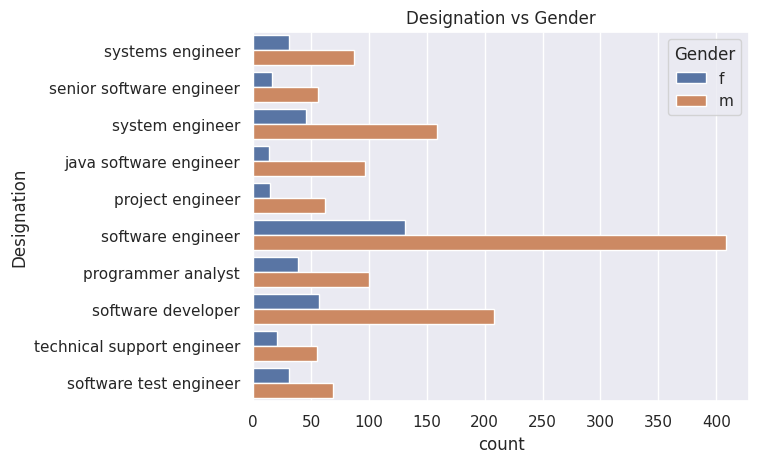

In [ ]:
sns.countplot(data=subset_df_designation, y='Designation', hue='Gender')
plt.title('Designation vs Gender')

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=0.135, p=1.000
Fail to Reject null hypothesis (H0): Probably independent


The count plot illustrating the distribution of Genders across the top 10 Designations aligns with the chi-square test results (stat=0.135, p=1.000). The failure to reject the null hypothesis suggests probable independence between Designation and Gender in the dataset. This confirms that the gender proportions among these top designations are likely independent.

In [ ]:
freq_table = pd.crosstab(df['DOL'], df['Degree'],normalize='columns')
freq_table

Degree,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA
DOL,,,,
Leave,0.523514,0.5,0.584906,0.633745
Present,0.476486,0.5,0.415094,0.366255


<Axes: xlabel='count', ylabel='Degree'>

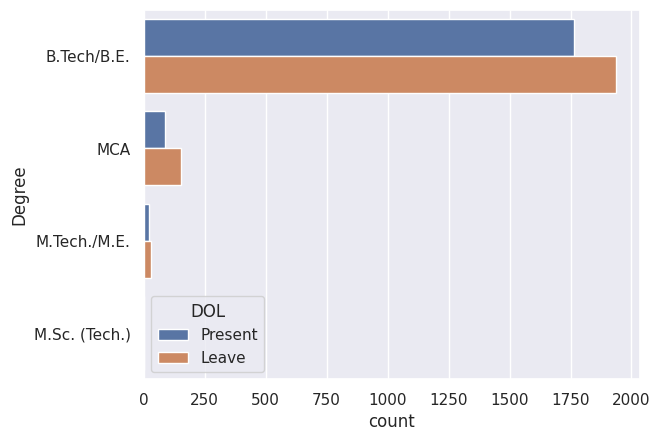

In [ ]:
sns.countplot(data=df, y='Degree', hue='DOL')

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=0.045, p=0.998
Fail to Reject null hypothesis (H0): Probably independent


The count plot illustrating the distribution of Degrees based on the DOL (Date of Leaving) status aligns with the chi-square test results (stat=0.045, p=0.998). The failure to reject the null hypothesis suggests probable independence between Degree and DOL in the dataset. This indicates that the distribution of Degrees is likely independent of the Date of Leaving status.






In [ ]:
subset_df_designation = df[df['Designation'].isin(top_designation)]
freq_table = pd.crosstab(subset_df_designation['DOL'], subset_df_designation['Designation'],normalize='columns')
freq_table

Designation,java software engineer,programmer analyst,project engineer,senior software engineer,software developer,software engineer,software test engineer,system engineer,systems engineer,technical support engineer
DOL,,,,,,,,,,
Leave,0.522523,0.410072,0.519481,0.361111,0.573585,0.445269,0.42,0.458537,0.440678,0.723684
Present,0.477477,0.589928,0.480519,0.638889,0.426415,0.554731,0.58,0.541463,0.559322,0.276316


<Axes: xlabel='count', ylabel='Designation'>

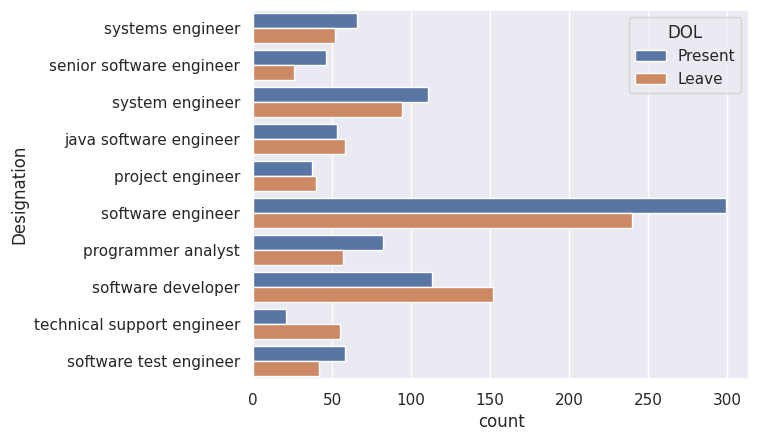

In [ ]:
sns.countplot(data=subset_df_designation, y='Designation', hue='DOL')

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=0.387, p=1.000
Fail to Reject null hypothesis (H0): Probably independent




*   
The count plot displaying the distribution of Designations based on the DOL (Date of Leaving) status aligns with the chi-square test results (stat=0.387, p=1.000). The failure to reject the null hypothesis suggests probable independence between Designation and DOL in the dataset. This indicates that the distribution of Designations is likely independent of the Date of Leaving status.
*   Notably, the top designation, "Technical Support Engineer," exhibits a substantial 72% leave rate.



In [ ]:
subset_df_specialization = df[df['Specialization'].isin(top_specialization)]
freq_table = pd.crosstab(subset_df_specialization['DOL'], subset_df_specialization['Specialization'],normalize='columns')
freq_table

Specialization,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & instrumentation eng,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,information technology,mechanical engineering
DOL,,,,,,,,,,
Leave,0.635246,0.548333,0.491935,0.585366,0.59375,0.578512,0.497727,0.540816,0.548485,0.517413
Present,0.364754,0.451667,0.508065,0.414634,0.40625,0.421488,0.502273,0.459184,0.451515,0.482587


<Axes: xlabel='count', ylabel='Specialization'>

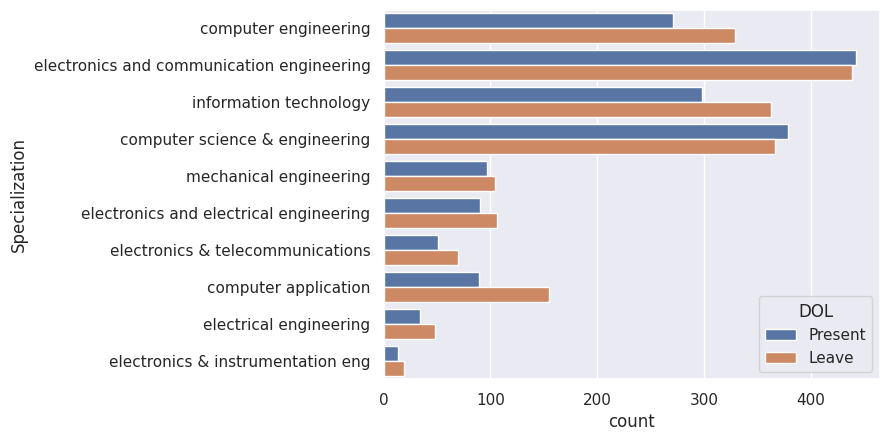

In [ ]:
sns.countplot(data=subset_df_specialization, y='Specialization', hue='DOL')

In [ ]:
chi_square(freq_table, significance_level=0.05)

stat=0.074, p=1.000
Fail to Reject null hypothesis (H0): Probably independent



The count plot depicting the distribution of Specializations based on the DOL (Date of Leaving) status aligns with the chi-square test results (stat=0.074, p=1.000). The failure to reject the null hypothesis suggests probable independence between Specialization and DOL in the dataset. This indicates that the distribution of Specializations is likely independent of the Date of Leaving status. Notably, among the top 10 specializations, no significant pattern of dependence on the leaving status is observed.

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**


In [ ]:
pip install fuzzywuzzy
pip install python-Levenshtein

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from fuzzywuzzy import process
import concurrent.futures

# List of computer science-related specializations
computer_specializ = ['computer engineering', 'computer science & engineering', 'computer application', 'electronics and computer engineering', 'computer science and technology', 'computer and communication engineering', 'computer networking', 'computer science']

# Desired designations
desired_designations = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

# 1. Filter data for Computer Science graduates and the specified job titles
filtered_df = df[df['Specialization'].isin(computer_specializ)]

# 2. Fuzzy matching to find approximate designations
def find_best_match(title):
    matches = process.extract(title, df['Designation'].unique(), limit=1)
    return matches[0][0]

# Number of concurrent processes
num_processes = 4

with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes) as executor:
    matched_titles = list(executor.map(find_best_match, desired_designations))

# 4. Filter data for approximate designations
filtered_df = df[df['Designation'].isin(matched_titles)]

# 5. Check the distribution of salaries
for title in matched_titles:
    title_data = filtered_df[filtered_df['Designation'] == title]['Salary']
    if len(title_data) > 0:  # Check if there's data for the title
        print(f"Statistics for {title}: {title_data.describe()}")
    else:
        print(f"No data for {title}")

# 6. Check if there is enough data to perform ANOVA
if all(len(filtered_df[filtered_df['Designation'] == title]['Salary']) > 0 for title in matched_titles):
    # 7. Conduct ANOVA
    f_stat, p_value = f_oneway(
        *[filtered_df[filtered_df['Designation'] == title]['Salary'] for title in matched_titles]
    )

    # 8. Print ANOVA results
    print(f"\nANOVA p-value: {p_value}")

    # 9. Post Hoc Test (Tukey's HSD) if ANOVA is significant
    if p_value < 0.05:
        tukey_results = pairwise_tukeyhsd(filtered_df['Salary'], filtered_df['Designation'])
        print("\nTukey's HSD results:")
        print(tukey_results.summary())
else:
    print("Insufficient data for ANOVA.")


Statistics for qa analyst: count        29.000000
mean     268793.103448
std      151561.251011
min      100000.000000
25%      185000.000000
50%      215000.000000
75%      330000.000000
max      800000.000000
Name: Salary, dtype: float64
Statistics for software engineer: count    5.390000e+02
mean     3.412152e+05
std      1.445396e+05
min      6.000000e+04
25%      2.550000e+05
50%      3.200000e+05
75%      4.000000e+05
max      1.500000e+06
Name: Salary, dtype: float64
Statistics for hardware engineer: count         8.000000
mean     281250.000000
std      128473.176745
min      105000.000000
25%      175000.000000
50%      277500.000000
75%      400000.000000
max      450000.000000
Name: Salary, dtype: float64
Statistics for associate engineer: count         6.000000
mean     290000.000000
std      149097.283677
min       80000.000000
25%      210000.000000
50%      307500.000000
75%      341250.000000
max      515000.000000
Name: Salary, dtype: float64

ANOVA p-value: 0.03443054

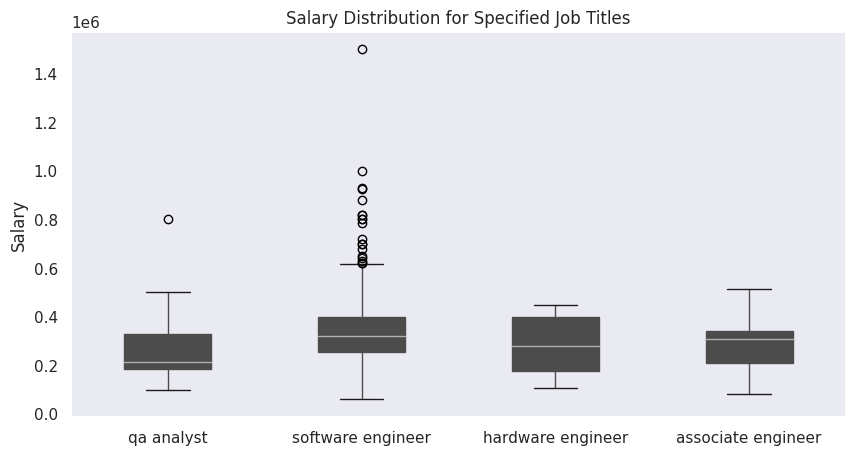

In [ ]:

# Combine data for all specified job titles into a single DataFrame
combined_data = pd.concat([filtered_df[filtered_df['Designation'] == title]['Salary'] for title in matched_titles], axis=1, keys=matched_titles)

# Create a box plot for salary distribution
plt.figure(figsize=(10,5))
box_plot = combined_data.boxplot(grid=False, vert=True, patch_artist=True)
plt.title('Salary Distribution for Specified Job Titles')
plt.ylabel('Salary')

# Show the plot
plt.show()



* Based on the statistical analysis, the claim made by the Times of India article seems to be partially supported by the data.

* ANOVA p-value: 0.0344 (less than 0.05), indicating that there is a statistically significant difference in salaries among at least two of the groups.

* Tukey's HSD results show that there is a significant difference in salaries between "qa analyst" and "software engineer" (p-adj = 0.044). However, there is no significant difference in salaries between other pairs of groups.

* In conclusion, the claim that graduates working as "Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer" can earn up to 2.5-3 lakhs as fresh graduates is partially supported by the data. While there is a significant difference in salaries between "qa analyst" and "software engineer," other pairs of groups do not show significant differences.

## **Conclusions**

* **In conclusion, the exploratory data analysis (EDA) of the dataset, sourced from Aspiring Mind Employment Outcome 2015 (AMEO), has unveiled a wealth of insights into the employment landscape of engineering students. Through meticulous examination and statistical testing, we have addressed data cleaning, handled missing values, and provided a thorough examination of key features.**

* **The dataset, consisting of 3998 rows and 39 columns, has been meticulously curated for further analysis. Our exploration has covered aspects such as salary distribution, academic performance metrics, gender balance, employment status, job roles, educational backgrounds, and graduation timelines.**

* **Key findings include a positively skewed salary distribution with outliers, distinctive academic performance patterns, gender imbalance, prevalent job roles, preferred job locations, and predominant educational backgrounds. The analysis also reveals potential relationships between academic performance and salary levels, as well as variations in salary associated with different degrees and job roles.**

* **Statistical tests, including Pearson correlation, t-tests, and chi-square tests, have been employed to validate observed patterns and relationships. Notably, the rejection of null hypotheses in certain tests has strengthened our confidence in the significance of observed trends.**

**In summary, this comprehensive exploratory data analysis lays the foundation for further investigations and modeling, offering valuable insights for stakeholders interested in understanding the intricate dynamics of employment outcomes for engineering students.**
